# Final Project Machine Learning

### 

### Data Analysis/Preparation 

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("kwb-2019.csv", sep=',', encoding='latin-1')

# change all '.' values to np.nan
df= df.where(df!='.', np.nan) 
#this creates a dictionary with the column names as keys and the % of NaN values as value

missing = {}
for key in df.keys():
    missing[key] = f"{round(int(df[key].isna().sum())/len(df)*100,2)}%"

#a dataframe of missing value percentages
missing_values_in_perc = pd.DataFrame([missing]).T

#getting all the names of the NaN columns
nan_columns = []
non_nan_columns = []
for key in missing_values_in_perc.T.keys():
    
    print(key, missing_values_in_perc.T[key][0])
    if missing_values_in_perc.T[key][0] == "100.0%":
        nan_columns.append(key)

    if missing_values_in_perc.T[key][0] == "0.0%":
        non_nan_columns.append(key)
print(f"NaN Columns: {nan_columns}")
print(f"non NaN Columns: {non_nan_columns}")
keys_list = list(df.keys())

#remove all nan_columns from datafram
for i in nan_columns:
    if i in keys_list:
        keys_list.remove(i)
        
# now df is the dataframe without all nan columns
df = df[keys_list]
df_non_nan = df[non_nan_columns]

gwb_code_10 0.0%
gwb_code_8 0.0%
regio 0.0%
gm_naam 0.0%
recs 0.0%
gwb_code 0.0%
ind_wbi 2.08%
a_inw 0.0%
a_man 0.0%
a_vrouw 0.0%
a_00_14 0.0%
a_15_24 0.0%
a_25_44 0.0%
a_45_64 0.0%
a_65_oo 0.0%
a_ongeh 0.0%
a_gehuwd 0.0%
a_gesch 0.0%
a_verwed 0.0%
a_w_all 0.0%
a_nw_all 0.0%
a_marok 0.0%
a_antaru 0.0%
a_suri 0.0%
a_tur 0.0%
a_ov_nw 0.0%
a_geb 0.0%
p_geb 0.0%
a_ste 0.0%
p_ste 0.0%
a_hh 0.0%
a_1p_hh 0.0%
a_hh_z_k 0.0%
a_hh_m_k 0.0%
g_hhgro 2.12%
bev_dich 3.89%
a_woning 0.0%
g_woz 20.83%
p_1gezw 9.21%
p_mgezw 9.21%
p_bewndw 9.21%
p_leegsw 9.21%
p_koopw 9.24%
p_huurw 9.24%
p_wcorpw 9.24%
p_ov_hw 9.24%
p_e_o_w 9.24%
p_bjj2k 9.21%
p_bjo2k 9.21%
g_ele 6.98%
g_ele_ap 43.24%
g_ele_tw 34.71%
g_ele_hw 36.34%
g_ele_2w 31.26%
g_ele_vw 21.65%
g_ele_hu 22.48%
g_ele_ko 8.41%
g_gas 8.71%
g_gas_ap 44.68%
g_gas_tw 36.22%
g_gas_hw 37.74%
g_gas_2w 32.34%
g_gas_vw 22.59%
g_gas_hu 24.14%
g_gas_ko 9.99%
p_stadsv 94.12%
a_inkont 100.0%
g_ink_po 100.0%
g_ink_pi 100.0%
p_ink_li 100.0%
p_ink_hi 100.0%
p_n_act 100

In [ ]:
df_townships = df_non_nan.loc[df_non_nan["recs"] == "Gemeente"]
print(df_townships.keys())

good_features = ['gwb_code_10', 'gm_naam', 'a_inw',
         'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64',
         'a_65_oo', 'a_ongeh', 'a_gehuwd', 'a_gesch', 'a_verwed',
         'a_hh', 'a_1p_hh', 'a_hh_z_k', 'a_hh_m_k', 'a_woning',
         'a_opp_ha', 'a_lan_ha', 'a_wat_ha'] 

df_townships = df_townships[good_features]
df_townships.rename(columns = {'gwb_code_10':'Regions'}, inplace = True)
df_townships.head(5)

Index(['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code',
       'a_inw', 'a_man', 'a_vrouw', 'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64',
       'a_65_oo', 'a_ongeh', 'a_gehuwd', 'a_gesch', 'a_verwed', 'a_w_all',
       'a_nw_all', 'a_marok', 'a_antaru', 'a_suri', 'a_tur', 'a_ov_nw',
       'a_geb', 'p_geb', 'a_ste', 'p_ste', 'a_hh', 'a_1p_hh', 'a_hh_z_k',
       'a_hh_m_k', 'a_woning', 'a_bedv', 'a_pau', 'a_bst_b', 'a_bst_nb',
       'a_m2w', 'a_opp_ha', 'a_lan_ha', 'a_wat_ha'],
      dtype='object')


,Regions,gm_naam,a_inw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,a_woning,a_opp_ha,a_lan_ha,a_wat_ha
1,GM0003,Appingedam,11721,1718,1238,2376,3491,2898,4981,4874,1048,818,5531,2097,1729,1705,6032,2458,2378,80
9,GM0010,Delfzijl,24716,3498,2625,4856,7552,6185,10364,10501,2063,1788,11571,4292,3745,3534,12182,22750,13307,9443
67,GM0014,Groningen,231299,28822,50342,67886,50900,33349,150951,55871,16234,8243,135076,79635,29723,25718,114733,19796,18560,1236
226,GM0024,Loppersum,9614,1447,1052,1893,3099,2123,4187,4212,708,507,4282,1390,1506,1386,4698,11199,11104,95
254,GM0034,Almere,207904,39067,26989,57771,60643,23434,108536,74912,18746,5710,87390,27837,21444,38109,84161,24877,12919,11958


In [ ]:
import numpy as np
df_pp = pd.read_csv("/work/avgPP.csv", sep=';')
df_pp2= df_pp.drop(index= df_pp.index[:17], axis=0)

In [ ]:
#Combining the two data frames:
df_data= pd.merge(df_townships, df_pp2, on = 'Regions')

keys_list_data = list(df_data.keys())
keys_list_data.remove("ID")
keys_list_data.remove("Periods")

# print(keys_list_data)
df_data = df_data[keys_list_data]
#df_data.head(5)

copy_df = df_data
print(copy_df.sort_values(by=['AveragePurchasePrice_1'], ascending=True))
copy_df.AveragePurchasePrice_1.describe()


    Regions      gm_naam  a_inw  a_00_14  a_15_24  a_25_44  a_45_64  a_65_oo  \
1    GM0010     Delfzijl  24716     3498     2625     4856     7552     6185   
209  GM0765       Pekela  12214     1802     1369     2616     3673     2754   
250  GM0899     Brunssum  28103     3598     2789     5961     8945     6810   
125  GM0400   Den Helder  55604     8044     5970    12485    16590    12515   
326  GM1895      Oldambt  38129     5264     4082     7656    11880     9247   
..      ...          ...    ...      ...      ...      ...      ...      ...   
73   GM0277    Rozendaal   1654      300      172      238      522      422   
182  GM0629    Wassenaar  26211     4433     2936     4290     7843     6709   
131  GM0417        Laren  11197     1725     1045     1674     3252     3501   
113  GM0376     Blaricum  11200     2006     1048     2271     3056     2819   
114  GM0377  Bloemendaal  23410     4170     2514     3541     7016     6169   

     a_ongeh  a_gehuwd  ...  a_verwed  

count       355.000000
mean     308810.569014
std       85326.897241
min      155120.000000
25%      257374.000000
50%      293693.000000
75%      340105.000000
max      831578.000000
Name: AveragePurchasePrice_1, dtype: float64

In [ ]:
df_regions = df_data[['Regions', 'gm_naam']]
for i in ['Regions', 'gm_naam']:
    if i in df_data.keys():
        del df_data[i]

# print(df_regions.head())
# print(df_data.head())


Next we look at the data types to ensure that they are all correct. 

In [ ]:
df_data.dtypes

a_inw                       int64
a_00_14                     int64
a_15_24                     int64
a_25_44                     int64
a_45_64                     int64
a_65_oo                     int64
a_ongeh                     int64
a_gehuwd                    int64
a_gesch                     int64
a_verwed                    int64
a_hh                        int64
a_1p_hh                     int64
a_hh_z_k                    int64
a_hh_m_k                    int64
a_woning                    int64
a_opp_ha                    int64
a_lan_ha                    int64
a_wat_ha                    int64
AveragePurchasePrice_1    float64
dtype: object

In [ ]:
df_data['AveragePurchasePrice_1'] = df_data['AveragePurchasePrice_1'].apply(np.int64)

In [ ]:
def missing_values_percentages(df):

    missing = {}
    #this will create a dictionary that has variables as keys and % of missing values as values
    for key in df.keys():
        missing[key] = f"{round(int(df[key].isna().sum())/len(df)*100,2)}%"

    missing_values_in_perc = pd.DataFrame([missing]).T

    return missing_values_in_perc

print(missing_values_percentages(df_data))

                           0
a_inw                   0.0%
a_00_14                 0.0%
a_15_24                 0.0%
a_25_44                 0.0%
a_45_64                 0.0%
a_65_oo                 0.0%
a_ongeh                 0.0%
a_gehuwd                0.0%
a_gesch                 0.0%
a_verwed                0.0%
a_hh                    0.0%
a_1p_hh                 0.0%
a_hh_z_k                0.0%
a_hh_m_k                0.0%
a_woning                0.0%
a_opp_ha                0.0%
a_lan_ha                0.0%
a_wat_ha                0.0%
AveragePurchasePrice_1  0.0%


In [ ]:
df_data.AveragePurchasePrice_1.describe()

count       355.000000
mean     308810.569014
std       85326.897241
min      155120.000000
25%      257374.000000
50%      293693.000000
75%      340105.000000
max      831578.000000
Name: AveragePurchasePrice_1, dtype: float64

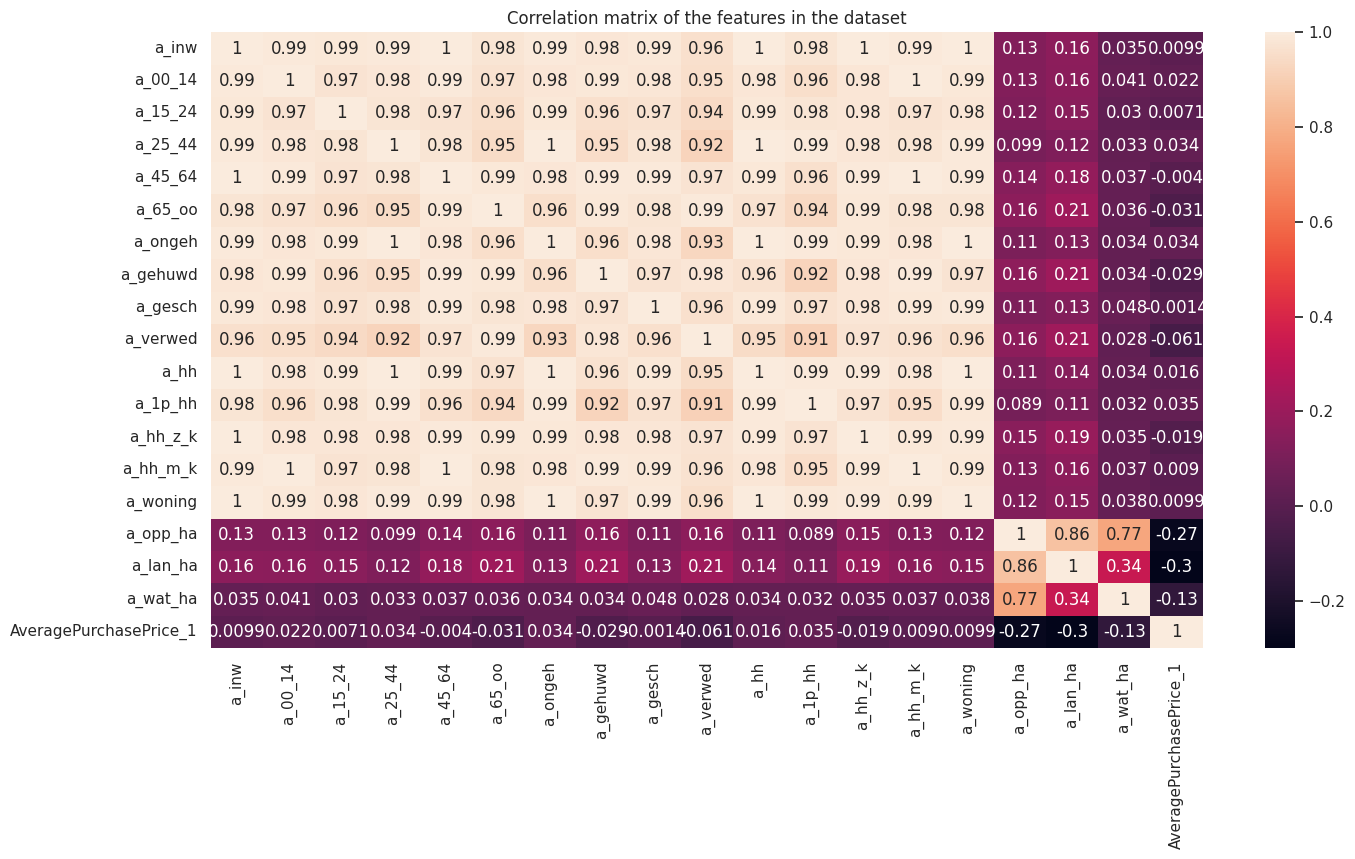

<Figure size 1600x800 with 0 Axes>

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

def corrMatrix(data):
    corrM=data.corr()
    sn.set(rc={"figure.figsize":(16,8)})
    sn.heatmap(corrM,annot=True)
    plt.title(f"Correlation matrix of the features in the dataset")
    plt.figure()
    

corrMatrix(df_data)



/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='AveragePurchasePrice_1', ylabel='a_inw'>

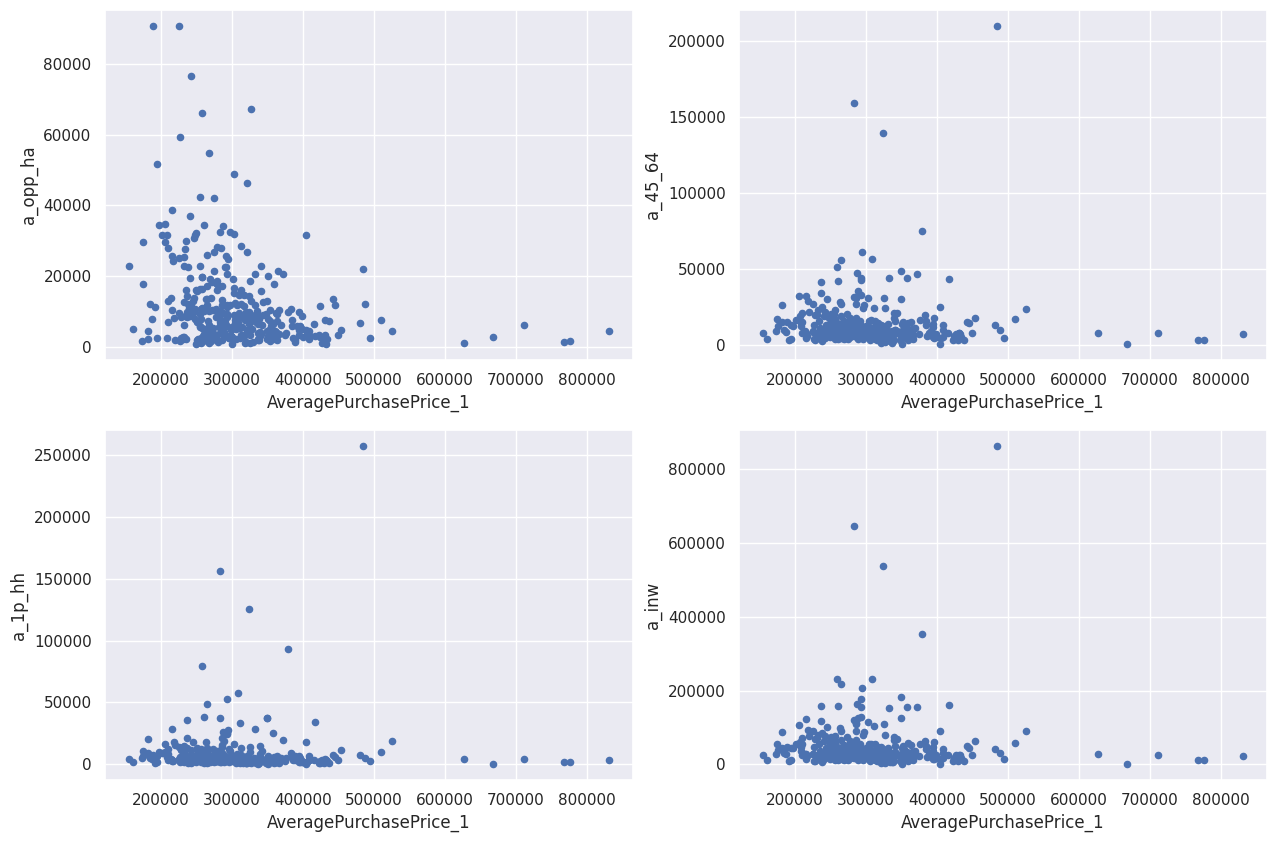

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
df_data.plot(kind='scatter',x='AveragePurchasePrice_1',y='a_opp_ha', ax=ax[0,0])
df_data.plot(kind='scatter',x='AveragePurchasePrice_1',y='a_45_64', ax=ax[0,1])
df_data.plot(kind='scatter',x='AveragePurchasePrice_1',y='a_1p_hh', ax=ax[1,0])
df_data.plot(kind='scatter',x='AveragePurchasePrice_1',y='a_inw', ax=ax[1,1])

In [ ]:
if 'a_hh' in df_data.keys():
    del df_data['a_hh']

Next split the data into train and test, and begin training a model. 

In [ ]:
from sklearn.model_selection import train_test_split
features = list(df_data.keys())
features.remove('AveragePurchasePrice_1')
avg_purchased_price = df_data['AveragePurchasePrice_1']
 
def split_data(data, features):
    X = data.loc[:, features]
    y = data.loc[:, ['AveragePurchasePrice_1']]
 
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 6)
 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df_data, features)

### Model1: Linear  

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# scale, classifier into pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import *
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
 
 
def create_pipeline(scalar, regressor, X_train, X_test, y_train, y_test):
 
    start=datetime.now()
 
 
 
    #excluding ID from model
    features = list(X_train.keys())

    #defining data set
    X_trn = X_train
    y_trn = y_train
    X_tst = X_test
    y_tst = y_test
 
 
    if regressor == "Lasso":
 
        #defining pipeline
        pipe = make_pipeline(scalar, linear_model.Lasso())
 
        #get param grid
        alpha_grid = {"lasso__alpha": np.logspace(-3,3,10)}
 
        #execute GridSearch
        gridcv = GridSearchCV(pipe, alpha_grid, cv=5, return_train_score=True)
 
        #fit data
        gridcv.fit(X_trn, y_trn)
 
        best_param = gridcv.best_params_
 
        #y_predicted 
        y_pred = gridcv.predict(X_tst)
        
 
 
        print(50*"-")
        print(f"Scalar: {scalar}, {str(regressor)}()")
        print(f"[+] Best parameter: {best_param}\n[+] Test Score: {gridcv.score(X_tst, y_tst)}\n[+] Total runtime: {datetime.now()-start}")
 
 
    if regressor == "Ridge":
 
        #defining pipeline
        pipe = make_pipeline(scalar, linear_model.Ridge())
 
        #get param grid
        alpha_grid = {"ridge__alpha": np.logspace(-3,3,10)}
 
        #execute GridSearch
        gridcv = GridSearchCV(pipe, alpha_grid, cv=5, return_train_score=True)
 
        #fit data
        gridcv.fit(X_trn, y_trn)
 
        best_param = gridcv.best_params_
 
        #y_predicted 
        y_pred = gridcv.predict(X_tst)
        
 
 
        print(50*"-")
        print(f"Scalar: {scalar}, {str(regressor)}()")
        print(f"[+] Best parameter: {best_param}\n[+] Test Score: {gridcv.score(X_tst, y_tst)}\n[+] Total runtime: {datetime.now()-start}")
 
    if regressor == "ElasticNet":
 
        #defining pipeline
        pipe = make_pipeline(scalar, ElasticNet())
 
        #get param grid
        alpha_grid = {"elasticnet__alpha": np.logspace(-3,3,10), "elasticnet__l1_ratio": np.linspace(0.00001, 1, 14)}
 
        #execute GridSearch
        gridcv = GridSearchCV(pipe, alpha_grid, cv=5, return_train_score=True)
 
        #fit data
        gridcv.fit(X_trn, y_trn)
 
        best_param = gridcv.best_params_
 
        #y_predicted 
        y_pred = gridcv.predict(X_tst)
        
 
        print(50*"-")
        print(f"{str(scalar)}, {str(regressor)}()")
        print(f"[+] Best parameter: {best_param}\n[+] Test Score: {gridcv.score(X_tst, y_tst)}\n[+] Total runtime: {datetime.now()-start}")
 
    if regressor == "Linear":
 
        #defining pipeline
        pipe = make_pipeline(scalar, LinearRegression())
 
        #fit data
        pipe.fit(X_trn, y_trn)
 
        #y_predicted 
        y_pred = pipe.predict(X_tst)
        
 
        print(50*"-")
        print(f"{str(scalar)}, {str(regressor)}()")
        print(f"[+] Test Score: {pipe.score(X_tst, y_tst)}\n[+] Total runtime: {datetime.now()-start}")

In [ ]:
for scalar in [StandardScaler(), MinMaxScaler()]:
    print(f"Scores for models scaled with {scalar}")

    for regressor in ["Linear" ,"Ridge", "ElasticNet" ,"Lasso"]:
    
        create_pipeline(scalar, regressor, X_train, X_test, y_train, y_test) 
    print("\n\n")

Scores for models scaled with StandardScaler()
--------------------------------------------------
StandardScaler(), Linear()
[+] Test Score: 0.19869556949458844
[+] Total runtime: 0:00:00.008244
--------------------------------------------------
Scalar: StandardScaler(), Ridge()
[+] Best parameter: {'ridge__alpha': 2.154434690031882}
[+] Test Score: 0.1809336369367095
[+] Total runtime: 0:00:00.389352
--------------------------------------------------
StandardScaler(), ElasticNet()
[+] Best parameter: {'elasticnet__alpha': 0.021544346900318832, 'elasticnet__l1_ratio': 0.2307769230769231}
[+] Test Score: 0.14808032561802664
[+] Total runtime: 0:00:05.998751
--------------------------------------------------
Scalar: StandardScaler(), Lasso()
[+] Best parameter: {'lasso__alpha': 1000.0}
[+] Test Score: 0.13169604705042992
[+] Total runtime: 0:00:00.463074



Scores for models scaled with MinMaxScaler()
--------------------------------------------------
MinMaxScaler(), Linear()
[+] Test Sc

### Model 2: Decision Trees

Scaler: MinMaxScaler(), model: 
[+] Test Score: -0.8181919609052948
[+] Cross Valuation score: [-0.63605224  0.02012018 -1.42638947 -0.66364271 -0.55260628]
[+] MSE: 10135583941.595505



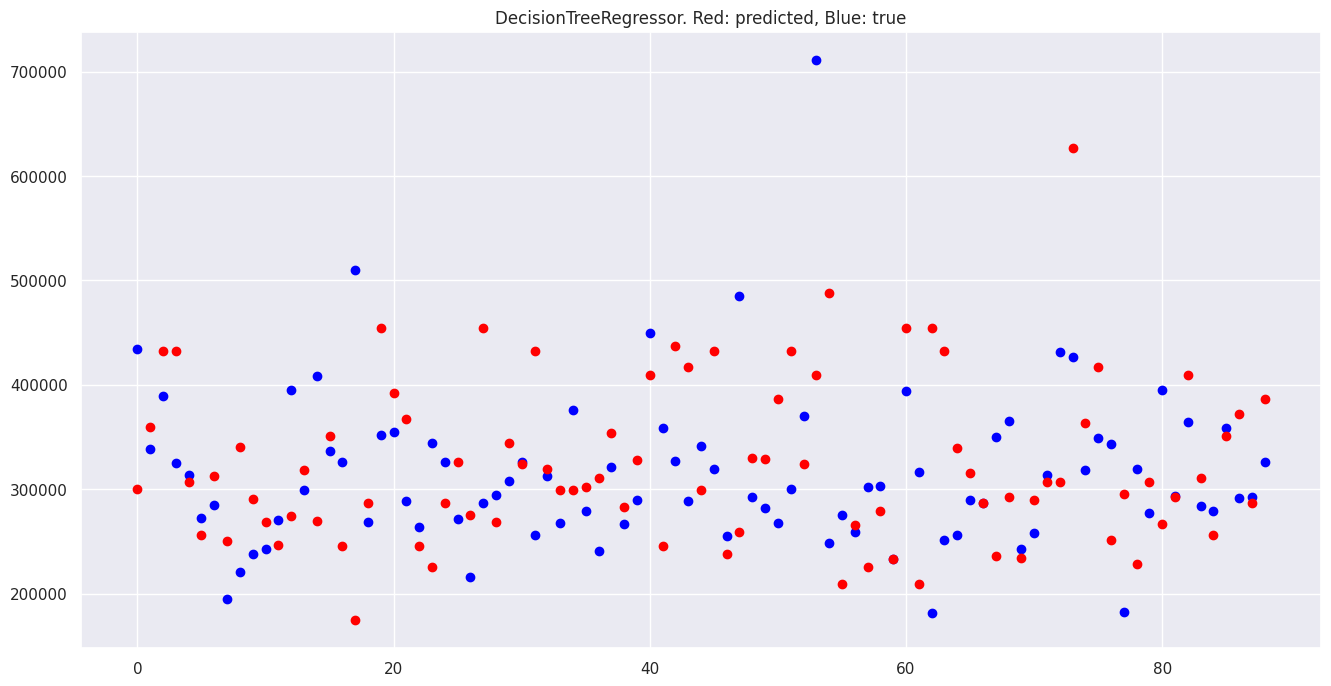

Scaler: StandardScaler(), model: 
[+] Test Score: -1.2618587564069452
[+] Cross Valuation score: [-0.76524438  0.05945023 -4.016692   -0.55220288 -0.37056028]
[+] MSE: 12608822270.988764



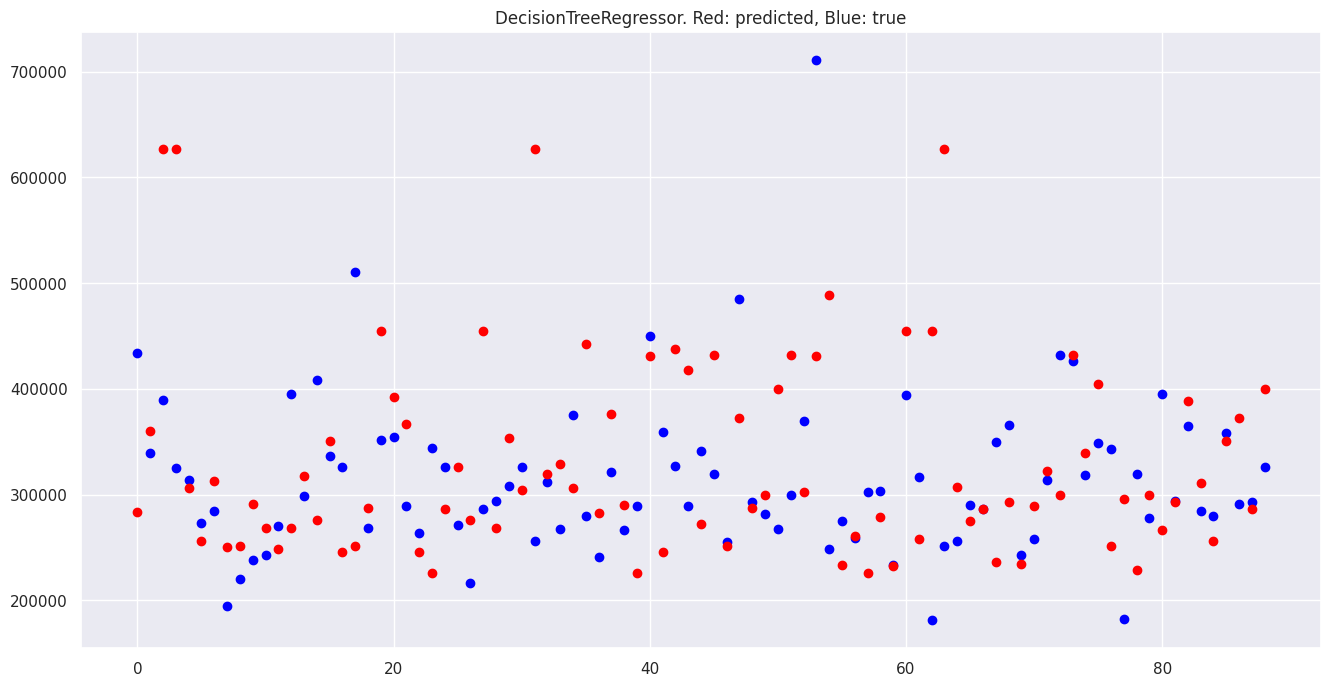

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


import matplotlib.pyplot as plt
import numpy as np

#plot to compare true and predicted data
def plotGraph(y_test,y_pred,regressorName):

    my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

def decisionTree_pipe(scaler, X_train, X_test, y_train, y_test):

    #create pipe
    pipe = make_pipeline(scaler, DecisionTreeRegressor())

    #fit data
    pipe.fit(X_train, y_train)

    #y_predicted 
    y_pred = pipe.predict(X_test)

    print(f"Scaler: {scaler}, model: ")
    print(f"[+] Test Score: {pipe.score(X_test, y_test)}")
    print(f"[+] Cross Valuation score: {cross_val_score(pipe, X_train, y_train, cv=5)}")
    print(f"[+] MSE: {mean_squared_error(y_test, y_pred)}\n")
    plotGraph(y_test, y_pred, "DecisionTreeRegressor. Red: predicted, Blue: true")


for scaler in [MinMaxScaler(), StandardScaler()]:
    decisionTree_pipe(scaler, X_train, X_test, y_train, y_test)



In [ ]:
from sklearn.model_selection import GridSearchCV
params =  { 'max_features':range(1,20),'max_depth':range(1,30)}
grid = GridSearchCV(estimator=model_2,param_grid=params,cv=10,n_jobs=1,verbose=2)
grid.fit(X_train, y_train)
bestparams = grid.best_params_
bestscore = grid.best_score_
bestestimator= grid.best_estimator_

[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=15; total time=   0.0s
[CV] END ......................max_depth=24, max_features=16; total time=   0.0s
[CV] END ......................max_depth=24, max_features=16; total time=   0.0s
[CV] END ......................max_depth=24, max_features=16; total time=   0.0s
[CV] END ...................

In [ ]:
print(bestparams)
print(bestscore)
print(bestestimator)

{'max_depth': 2, 'max_features': 18}
0.007490956710597496
DecisionTreeRegressor(max_depth=2, max_features=18)


In [ ]:
from sklearn.metrics import classification_report
model_tree_grid = DecisionTreeRegressor(max_depth=2, max_features=18)
model_tree_grid.fit(X_train,y_train)
y_pred = model_tree_grid.predict(X_test)
y_true= y_true
print(model_tree_grid.score(X_train,y_train))
print(model_tree_grid.score(X_test,y_test))
#print(classification_report(y_true,y_pred))

0.3079385958680574
-0.05568987132426484


In [ ]:
def scaled_DTR(scaler, X_train, X_test, y_train, y_test):
    
    pipe = make_pipeline(scaler, DecisionTreeRegressor())

    #get param grid
    param_grid = {"decisiontreeregressor__max_features": range(1,20), "decisiontreeregressor__max_depth": range(1,30),
                    "decisiontreeregressor__min_samples_split": range(1,10)}

    #execute GridSearch
    gridcv = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)

    #fit data
    gridcv.fit(X_train, y_train)

    best_param = gridcv.best_params_

    #y_predicted 
    y_pred = gridcv.predict(X_test)


    print(50*"-")
    print(f"{str(scaler)}")
    print(f"[+] Best parameter: {best_param}\n[+] Test Score: {gridcv.score(X_test, y_test)}\n Train Score: {gridcv.score(X_train, y_train)}")

for scaler in [MinMaxScaler(), StandardScaler()]:
    scaled_DTR(scaler, X_train, X_test, y_train, y_test)

first_model = DecisionTreeRegressor(max_depth=1, max_features=2)
second_model =DecisionTreeRegressor(max_depth=2, max_features=18)

for model in [first_model, second_model]:
    for scaler in [MinMaxScaler(), StandardScaler()]:

        pipe = make_pipeline(scaler, DecisionTreeRegressor())
        pipe.fit(X_train, y_train)
        pipe.predict(X_test)
        print(f"Train Score: {pipe.score(X_train, y_train)}\nTest Score:{pipe.score(X_test, y_test)}" )


--------------------------------------------------
MinMaxScaler()
[+] Best parameter: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__max_features': 9, 'decisiontreeregressor__min_samples_split': 8}
[+] Test Score: -0.6486626079510693
 Train Score: 0.3856673391313168
--------------------------------------------------
StandardScaler()
[+] Best parameter: {'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__max_features': 13, 'decisiontreeregressor__min_samples_split': 5}
[+] Test Score: -0.5246433910462536
 Train Score: 0.45542361689080135
Train Score: 1.0
Test Score:-1.5382960947101987
Train Score: 1.0
Test Score:-1.7563895577816862
Train Score: 1.0
Test Score:-1.8491783695542638
Train Score: 1.0
Test Score:-1.342712662578991


In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred=regr.predict(X_test)
y_true=y_test
print(regr.score(X_train,y_train))
#print(classification_report(y_true,y_pred))

-5.283191554193673


### Model 3: Random Forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
pipeline_forest = Pipeline([('scaler', MinMaxScaler()), ('regressor', RandomForestRegressor())])
pipeline_forest.fit(X_train, y_train)
r2_forest = pipeline_forest.score(X_test, y_test)
r2_forest2 = pipeline_forest.score(X_train, y_train)
print(f"test score: {r2_forest}")
print(f"train score: {r2_forest2}")

test score: -0.033336549663772086
train score: 0.8622699285713457


In [ ]:
from sklearn.model_selection import GridSearchCV
model_randomforest = RandomForestRegressor()
params =  { 'max_features':['sqrt'],'max_depth':range(14,17), 'n_estimators':range(100,150), 'min_samples_leaf':range(1,3)}
grid = GridSearchCV(estimator=model_randomforest,param_grid=params,cv=5)
grid.fit(X_train, y_train)
bestparams = grid.best_params_
bestscore = grid.best_score_
bestestimator= grid.best_estimator_

In [ ]:
print(bestparams)
print(bestscore)
print(bestestimator)

{'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 101}
0.13227994722823916
RandomForestRegressor(max_depth=16, max_features='sqrt', n_estimators=101)


In [ ]:
model_randomforest_grid = RandomForestRegressor(max_depth=16, max_features= 'sqrt', n_estimators=141, min_samples_leaf=2)
model_randomforest_grid.fit(X_train,y_train)
print(model_randomforest_grid.score(X_train,y_train))
print(model_randomforest_grid.score(X_test,y_test))

0.8527515885171466
0.035359580816719194


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=42434166-f64b-44a8-ba1f-d402f37ddf0d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>